<a href="https://colab.research.google.com/github/CHANDANAHEGADE/Supervised-learning-projects/blob/main/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
#Reading dataset
import pandas as pd
Salary=pd.read_csv('Salary_Data.csv')
#Displaying sample data
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#Information about the data points in the dataset
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#Descriptive statistics of the variables
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'YearsExperience v/s Salary')

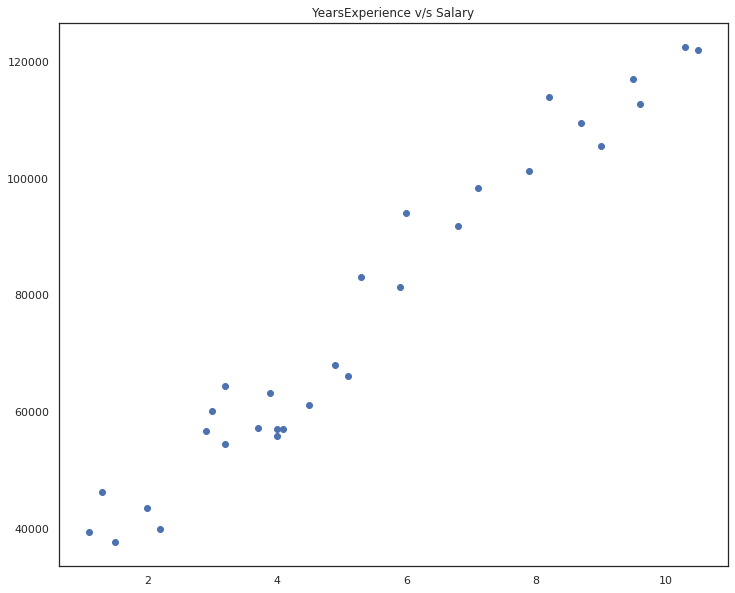

In [ ]:
#Basic visualization of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(12,10)})
plt.scatter(Salary['YearsExperience'], Salary['Salary'])
plt.title('YearsExperience v/s Salary')

In [ ]:
#Checking for the missing values
Salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
x=np.array(Salary['YearsExperience']).reshape(-1, 1)
y=np.array(Salary['Salary'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [ ]:
#Model building
from sklearn.linear_model import LinearRegression
#Fitting the model
Model= LinearRegression()
#Training the model
Model.fit(x_train,y_train)
#Predicting the values
Prediction = Model.predict(x_test)
#Accuracy score
print("Score: ", Model.score(x_test,y_test))
pd.DataFrame({'Years Experience': x_test[:,0], 'Actual Salary': y_test, 'Predicted Salary': Prediction})

Score:  0.9493462715263523


,Years Experience,Actual Salary,Predicted Salary
0,3.2,54445.0,57147.808061
1,7.1,98273.0,94227.196421
2,5.1,66029.0,75212.125467
3,9.6,112635.0,117996.035113
4,4.1,57081.0,65704.589990
5,3.7,57189.0,61901.575800
6,7.9,101302.0,101833.224803
7,4.9,67938.0,73310.618372
8,10.5,121872.0,126552.817043


In [ ]:
#Model evaluation
from sklearn.metrics import r2_score
test_x = np.asanyarray(Salary['YearsExperience']).reshape(-1,1)
test_y = np.asanyarray(Salary['Salary'])

y_hat = Model.predict(test_x)

print("Mean Absolute Error(MAE) : ",np.mean(np.absolute(y_hat - test_y)))
print("Mean Squared Error(MSE) : ",np.mean(np.absolute(y_hat - test_y)**2))
print("R2 Score(R2) : ",r2_score(y_hat,test_y))

Mean Absolute Error(MAE) :  4804.780484779792
Mean Squared Error(MSE) :  32827914.95340526
R2 Score(R2) :  0.9533512408881175


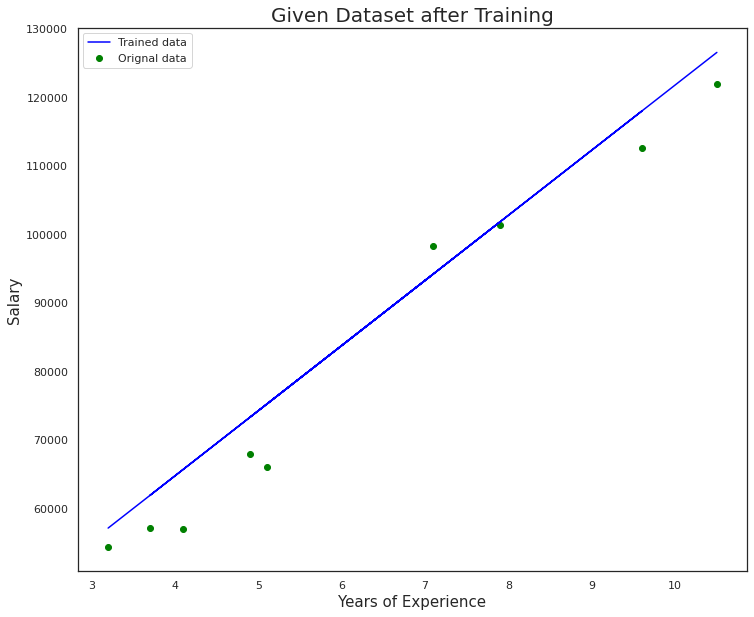

In [ ]:
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, Prediction, color='blue')
plt.legend(["Trained data","Orignal data"])
plt.title("Given Dataset after Training",size= 20)
plt.xlabel("Years of Experience",size = 15)
plt.ylabel("Salary",size = 15)
plt.show()